# Police violence in America
In the wake of recent protests against police violence, especially against black people, the question arises what numbers can tell us, to proof that cases like the killing of George Floyd are not unique cases. 
1. Are black people killed more often than other ethnicities regarding population distribution?
2. Are there places in America where black people are killed more often? 
3. How many of the police officers that killed someone were held accountable? 
4. Can we identify any solutions that seem to lower the number of killings? 

# Importing data

In [43]:
# Install packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Import Dataset from url source 
url = "https://mappingpoliceviolence.org/s/MPVDatasetDownload.xlsx"

police_killings = pd.read_excel(url , sheet_name=0)
pd_killings = pd.read_excel(url, sheet_name=1)
state_killings = pd.read_excel(url, sheet_name=2)
blackmen_killings = pd.read_excel(url, sheet_name=3)

In [3]:
police_killings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,2019-12-31,Broad St.,Globe,AZ,85501.0,...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664
1,Name withheld by police,NaN,Male,Unknown race,NaN,2019-12-31,7239-7411 I-40,Memphis,AR,38103.0,...,No,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665
2,Terry Hudson,57,Male,Black,NaN,2019-12-31,3600 N 24th St,Omaha,NE,68110.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661
3,Malik Williams,23,Male,Black,NaN,2019-12-31,30800 14th Avenue South,Federal Way,WA,98003.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662
4,Frederick Perkins,37,Male,Black,NaN,2019-12-31,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667


In [4]:
pd_killings.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,10.0,1.0,...,6040.333333,11.065881,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.375820
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.666667,3.546806,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.502131
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.333333,10.894620,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.249641
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,1.0,NaN,4.0,1.0,...,1921.800000,5.258895,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.824724
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.000000,11.799916,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900.0,6.276151


In [5]:
state_killings.head()

,State,Population,African-American Alone,% African-American,% Victims Black,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People),Disparity in Rate
0,Alabama,4779736.0,1251311.0,0.261795,0.376812,0.115017,52.0,NaN,NaN,1.0,NaN,73.0,12.0,138.0,5.936631,4.124555,1.439338
1,Alaska,710231.0,23263.0,0.032754,0.121951,0.089197,5.0,1.0,12.0,NaN,NaN,15.0,8.0,41.0,30.704798,8.246814,3.723232
2,Arizona,6392017.0,259008.0,0.040521,0.090379,0.049858,31.0,114.0,14.0,NaN,NaN,141.0,43.0,343.0,17.098203,7.665812,2.230449
3,Arkansas,2915918.0,449895.0,0.154289,0.271845,0.117555,28.0,3.0,NaN,1.0,NaN,59.0,12.0,103.0,8.890963,5.046193,1.761915
4,California,37253956.0,2299072.0,0.061713,0.156830,0.095116,186.0,489.0,7.0,44.0,9.0,333.0,118.0,1186.0,11.557458,4.547935,2.541254


In [6]:
blackmen_killings.head()

,City,PD,Black Men Killed by Police (1/1/2013-12/31/2019),Black Male Population (2015 ACS) (Source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_B01001B&prodType=table),"Average Police Homicide Rate for Black Men (per 100,000) (2013-19)"
0,Reno,Reno Police Department,3.0,3556.0,12.052065
1,Oklahoma City,Oklahoma City Police Department,25.0,42192.0,8.464706
2,Santa Ana,Santa Ana Police Department,1.0,1779.0,8.030194
3,Anaheim,Anaheim Police Department,2.0,4021.0,7.105553
4,St. Louis,St. Louis Metropolitan Police Department,34.0,69439.0,6.994834


# Handling missing data

In [7]:
def missingdata_stats(lst):
    '''
    Takes a dataset and prints information with different measures of missing data.

    INPUT:
        lst (List of pandas.DataFrame): List of uncleaned pandas dataframe after loading.
    OUTPUT: 
        df (pandas.DataFrame): Stats of missing data of dataframe
    '''

    stats = []
    
    for df in lst: 
        # Columns with different values of missing data 
        zero_missing = df.columns[df.isnull().mean()==0]
        ten_missing = df.columns[df.isnull().mean() <= 0.1]
        thirty_missing = df.columns[df.isnull().mean() <= 0.3]
        eighty_missing = df.columns[df.isnull().mean() <= 0.8]

        stats.append([len(zero_missing), len(ten_missing), len(thirty_missing), len(eighty_missing)])
        
    stats_df = pd.DataFrame(stats, columns=["0%", "<=10%", "<=30%","<=80%"])
    
    return stats_df

In [8]:
data_list = (police_killings, pd_killings, state_killings, blackmen_killings)

missingdata_stats(data_list)

,0%,<=10%,<=30%,<=80%
0,9,21,21,26
1,0,31,41,44
2,0,12,14,16
3,1,5,5,5


In [9]:
police_killings.describe()

,Zipcode,WaPo ID (If included in WaPo database),ID
count,7624.000000,4878.000000,7663.000000
mean,60490.208290,2723.534645,3832.890121
std,28139.996523,1534.330297,2213.339298
min,1085.000000,3.000000,1.000000
25%,33452.500000,1402.250000,1916.500000
50%,67110.500000,2722.000000,3832.000000
75%,85745.250000,4050.750000,5749.500000
max,99801.000000,5439.000000,7667.000000


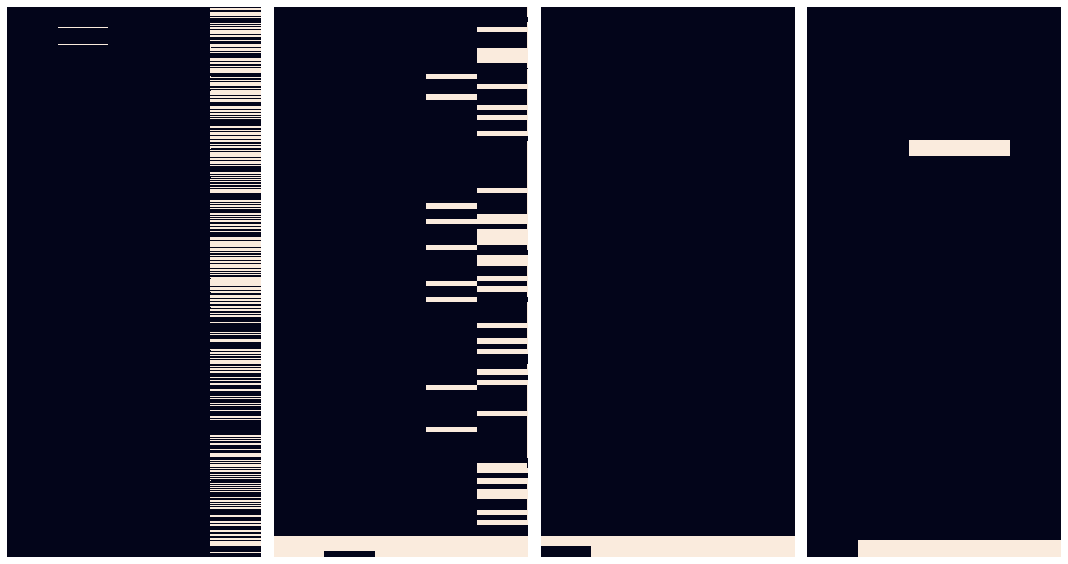

In [10]:
sns.set(style="white", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 4, figsize=(15, 8), sharex=True)
sns.despine(left=True)

# Plot subplots for different datasets
sns.heatmap(police_killings.isnull(), cbar=False, ax=axes[0])
sns.heatmap(pd_killings.isnull(), cbar=False, ax=axes[1])
sns.heatmap(state_killings.isnull(), cbar=False, ax=axes[2])
sns.heatmap(blackmen_killings.isnull(), cbar=False, ax=axes[3])

plt.setp(axes, yticks=[], xticks=[])
plt.tight_layout()

# Killings of black people

In [11]:
police_killings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,2019-12-31,Broad St.,Globe,AZ,85501.0,...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664
1,Name withheld by police,NaN,Male,Unknown race,NaN,2019-12-31,7239-7411 I-40,Memphis,AR,38103.0,...,No,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665
2,Terry Hudson,57,Male,Black,NaN,2019-12-31,3600 N 24th St,Omaha,NE,68110.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661
3,Malik Williams,23,Male,Black,NaN,2019-12-31,30800 14th Avenue South,Federal Way,WA,98003.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662
4,Frederick Perkins,37,Male,Black,NaN,2019-12-31,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667


In [12]:
race_dist = police_killings[police_killings["Victim's race"]]
race_dist.head()

#fig = px.bar(race_dist)
#fig.show()

KeyError: "None of [Index(['White', 'Unknown race', 'Black', 'Black', 'Black', 'White',\n       'Unknown race', 'White', 'Unknown race', 'White',\n       ...\n       'Black', 'Unknown race', 'White', 'Unknown race', 'Hispanic',\n       'Hispanic', 'Black', 'Hispanic', 'White', 'White'],\n      dtype='object', length=7663)] are in the [columns]"

### Proportion of black people

In [13]:
# Calculating percentage of black people in relation to population
percentage = state_killings["African-American Alone"].sum() / state_killings["Population"].sum()

# Calculating percentage of black people killed in relation to all killed people
percentage_killed = state_killings["# Black people killed"].sum() / state_killings["# People Killed"].sum()

print("{}% of all killed people are black, although they make up only {}% of US population.".format(round(percentage_killed*100,2), round(percentage*100,2)))

25.37% of all killed people are black, although they make up only 12.67% of US population.


### Frequency of killings of black people

In [39]:
# Look up the range of dates the dataset includes
police_killings["Date of Incident (month/day/year)"].describe()

count                    7663
unique                   2404
top       2013-06-16 00:00:00
freq                       10
first     2013-01-01 00:00:00
last      2019-12-31 00:00:00
Name: Date of Incident (month/day/year), dtype: object

In [26]:
#all_days = pd.date_range(start="1/1/2013", end="12/31/2019", freq='D')
killing_days = police_killings["Date of Incident (month/day/year)"].value_counts()
killing_days.tail()

2013-12-22    1
2018-10-04    1
2015-10-23    1
2016-04-25    1
2018-01-13    1
Name: Date of Incident (month/day/year), dtype: int64

AttributeError: 'DataFrame' object has no attribute 'ix'

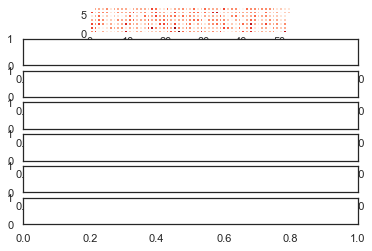

In [50]:
calmap.calendarplot(killing_days)

### It's not about the crime

### Accountability of police officers